<a href="https://colab.research.google.com/github/disenodc/MachineLearning_UNS/blob/main/TP_4_Deteccion_COVID_19_en_radiografias_de_pecho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deteccion COVID-19 en radiografias de pecho
The goal of this project is to build a model that identifies COVID-19, pneumonia in chest X-Ray images. The dataset is organized into 3 folders (COVID-19 cases, Normal , Pneumonia) and contains subfolders for each image category. There are 606 X-Ray images (JPEG). Data from [Mendeley](https://data.mendeley.com/datasets/fvk7h5dg2p/1). 

In [4]:
# Download and unzip
dataroot = "dataroot/"
!mkdir dataroot 
!wget -P dataroot https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/fvk7h5dg2p-1.zip


--2022-10-31 16:32:46--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/fvk7h5dg2p-1.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.100.224, 52.92.18.114, 3.5.70.108, ...
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.100.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198985388 (190M) [application/octet-stream]
Saving to: ‘dataroot/fvk7h5dg2p-1.zip’

fvk7h5dg2p-1.zip    100%[===================>] 189.77M  70.1MB/s    in 2.7s    

2022-10-31 16:32:49 (70.1 MB/s) - ‘dataroot/fvk7h5dg2p-1.zip’ saved [198985388/198985388]



In [5]:
# Unzip
import zipfile
with zipfile.ZipFile(dataroot+"fvk7h5dg2p-1.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)

In [16]:

import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
import seaborn as sns

from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras_preprocessing.image import ImageDataGenerator,load_img, img_to_array

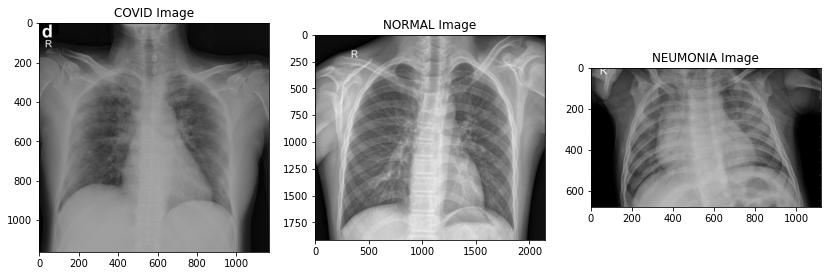

In [7]:
# Load and preview images
img_covid     = cv2.imread(dataroot+'COVID-19 cases/1-s2.0-S0929664620300449-gr2_lrg-d.jpg',0)
img_normal    = cv2.imread(dataroot+'Normal /IM-0011-0001-0001.jpeg',0)
img_pneumonia = cv2.imread(dataroot+'Pneumonia/person1650_virus_2854.jpeg',0)

plt.figure(figsize=(14,14))
plt.subplot(1,3,1)
plt.title('COVID Image')
plt.imshow(img_covid,cmap='gray')
plt.subplot(1,3,2)
plt.title('NORMAL Image')
plt.imshow(img_normal,cmap='gray')
plt.subplot(1,3,3)
plt.title('NEUMONIA Image')
plt.imshow(img_pneumonia,cmap='gray')

In [ ]:
path_img='Normal /IM-0011-0001-0001.jpeg'

In [8]:
#Input EPOCHS and BATCH

Image_Width = 150
Image_Height = 150
Cannels = 3

INPUT_SHAPE = (Image_Width, Image_Height, Cannels)
NB_CLASSES = 2
EPOCHS = 45
BATCH_SIZE = 6

In [9]:
# Defino el modelo con KERAS
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [10]:
#Compilo el modelo que voy a entrenar
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 72, 72, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 70, 70, 250)       144250    
                                                        

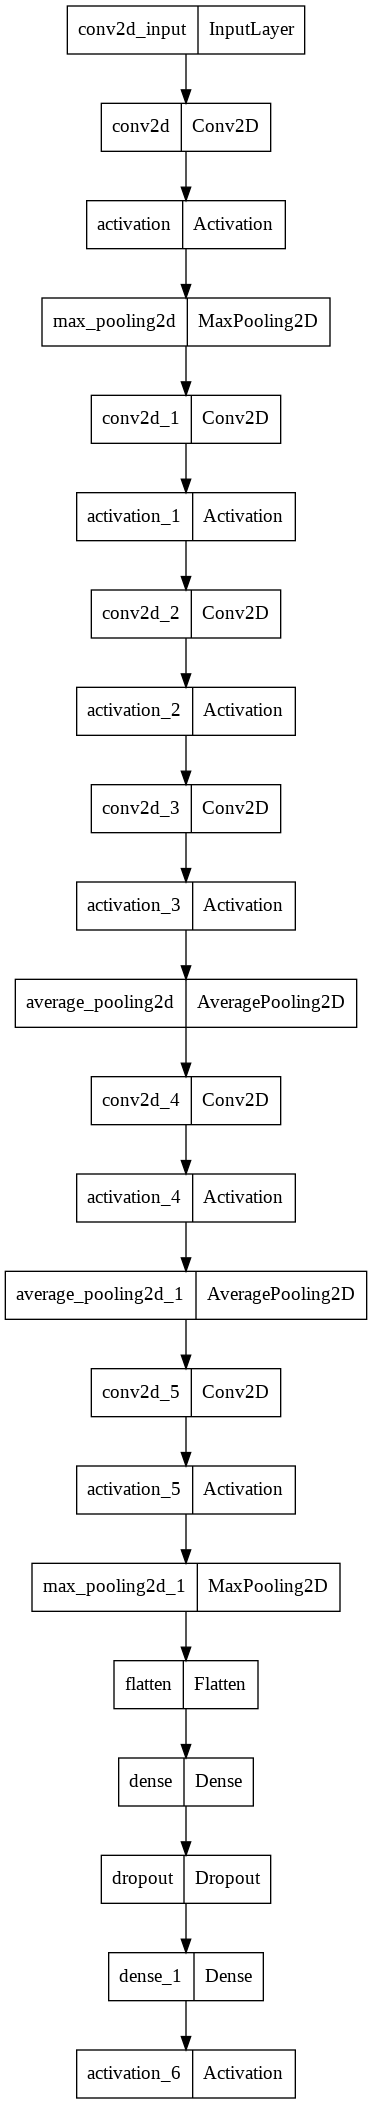

In [8]:
# Describo el modelo 
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model1.png')

Another important method to improve generalization is augmentation. This means generating more training data by randomly perturbing the images. If done in the right way, it can force the net to only learn translation-invariant features. If you train this model over hundreds of epochs, augmentation will definitely improve your performance. Here in the Kernel, we will only look at each image 4-5 times, so the difference is smaller. We use a Keras function for augmentation.

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.25)

train_generator = train_datagen.flow_from_directory(
    dataroot,
    target_size=(Image_Height, Image_Width),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    dataroot, 
    target_size=(Image_Height, Image_Width),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')

history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)

Found 453 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Epoch 1/45
75/75 [==============================] - 32s 281ms/step - loss: 12.1585 - accuracy: 0.4139 - val_loss: 0.4796 - val_accuracy: 0.3867
Epoch 2/45
75/75 [==============================] - 16s 216ms/step - loss: 27.4646 - accuracy: 0.4183 - val_loss: -0.3664 - val_accuracy: 0.3867
Epoch 3/45
75/75 [==============================] - 17s 229ms/step - loss: 6.9863 - accuracy: 0.4049 - val_loss: 1.9671 - val_accuracy: 0.3667
Epoch 4/45
75/75 [==============================] - 17s 231ms/step - loss: 2388.0591 - accuracy: 0.4922 - val_loss: -12164.5918 - val_accuracy: 0.5467
Epoch 5/45
75/75 [==============================] - 16s 220ms/step - loss: -961698.1250 - accuracy: 0.5011 - val_loss: 374925.3438 - val_accuracy: 0.5067
Epoch 6/45
75/75 [==============================] - 16s 219ms/step - loss: -66013820.0000 - accuracy: 0.5235 - val_loss: -321380256.0000 - val_accuracy: 0.5600
Epoch 7/45
75/75 [===

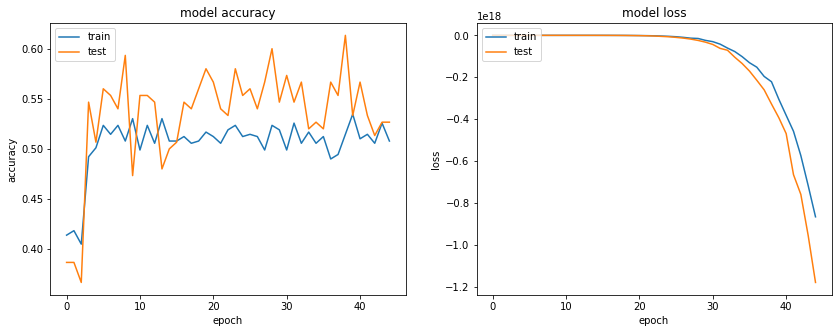

In [12]:
# Plot accuracy and loss
fig , ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'test'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.5078299641609192
validation_accuracy 0.5266666412353516


In [14]:
# Labeling and prediction
label = validation_generator.classes
pred= model.predict(validation_generator)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)

25/25 [==============================] - 5s 155ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
{'COVID-19 cases': 0, 'Normal ': 1, 'Pneumonia': 2}
['COVID-19 cases', 'COVID-19 cases', 'COVID-19 cases', 'COVID-19 cases', 'COVID-19 cases', 'COVID-19 cases', 'COVID-19 cases', 'COVID-19 cases', 'COVID-19 cases', 'COVID-19 cases', 'COVID-19 cases', 'COVID-19 cases', 'COVID-19 cases', 'COVID-19 cases', 'COVID-19 cases', 'COVID-19 cases', 'COVID-19 cases', 'COVID-19 cases', 'COVID-19 cases', 'COVID-19 cases', 'COVID-19 cases', 'COVID-19 cases', 'COVID-19 cases', 'COVID-19 cases', 'COVID-19 cases', 'COVID-19 cases', 'COVID-19 cases', 'COVID-19 cases', 'COVID-19 cases', 'COVID-19 cases', 'COVID-19 cases', 'COVID-19 cases', 'COVID-19 

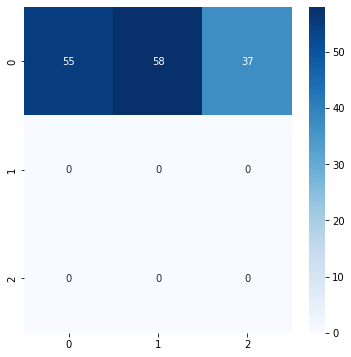

In [17]:
#Confusion Matrix
plt.figure(figsize = (6,6))
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(predicted_class_indices,label)
sns.heatmap(cf,cmap= "Blues", linecolor = 'black' , annot = True, fmt='')

In [18]:
correct = np.nonzero(predicted_class_indices == label)[0]
pred_class = predicted_class_indices.astype(int)

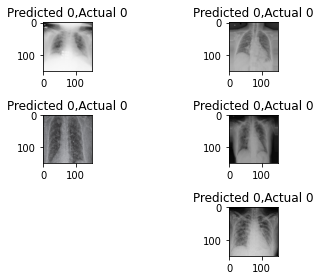

In [20]:
#Prediction / Actual
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.imshow(validation_generator[0][0][c].reshape(150,150,3))
    plt.title("Predicted {},Actual {}".format(pred_class.reshape(1,-1)[0][c], label[c]))
    plt.tight_layout()
    i += 1